<function matplotlib.pyplot.show(close=None, block=None)>

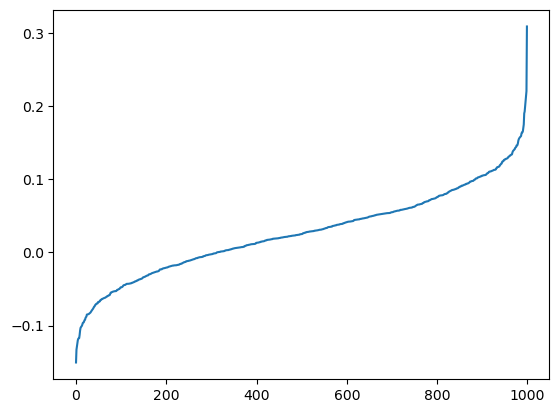

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_bandit_function(k):
    mean, deviation = 0, 1                                                 
    rng = np.random.default_rng()                               
    bandit_means = []
    for x in range(k):                                          #draw k gaussian random numbers q_i as centers
        bandit_means.append(rng.normal(mean, deviation))

    def bandit_function(action):                                #define a function which expects a parameter action and returns a random number from N(q_i,1)
        return rng.normal(bandit_means[action], 1)

    return bandit_function, bandit_means                        #return that function and a list of the q_i's


reward = [0] * 1000
rnd_int = np.random.randint
ep = 500                            #episodes
steps = 1000                        #steps per episode

for _ in range(ep):
    func, _ = get_bandit_function(10)
    for i in range(steps):
        reward[i] += func(rnd_int(0,10))

reward_average = list(map(lambda x: x / ep, reward))

plt.plot(np.sort(reward_average))
plt.show


In [3]:
def update_Q_and_N(Q,N,r,a):
    N[a] += 1
    Q[a] = Q[a] + 1/(N[a]) * (r - Q[a])
    return Q, N

Q = [0] * 10
N = [0] * 10
b_func, list = get_bandit_function(10)

for x in range(100000):
    a = rnd_int(0,10)
    Q, N =update_Q_and_N(Q,N,b_func(a),a)

print(Q)
print(list)

[1.2305433081540942, -1.1349752237114459, -0.612587586884141, 0.433452029638362, 1.0849376003594733, -1.6573839194718922, 0.9653908043956253, -0.2588242875224461, -0.2007574431275412, -0.7852257623162593]
[1.2495712171172018, -1.1376549099096682, -0.6099175964539421, 0.4287481531117579, 1.0706517062422718, -1.6681061600318146, 0.9559166572481886, -0.27708192897433537, -0.20740770853346427, -0.7881965121274416]


In [4]:
#Greedy

Q = [0] * 10
N = [0] * 10
bandit_function, list = get_bandit_function(10)
a = []

def greedy(bandit_function,Q,N):
    max_a = np.argwhere(Q == np.max(Q))
    if len(max_a) > 1:
        a = np.random.choice(np.ravel(max_a))
    else:
        a = max_a[0][0]
    r = bandit_function(a)
    Q, N = update_Q_and_N(Q,N,r,a)
    return Q,N,r

for x in range(100000):
    Q,N,_ = greedy(bandit_function, Q,N)

print(Q)    
print(N)
print(list)


[0, 0, -1.1718824928427705, 0, 0.5980821935736315, 0, 0, -2.2430149351149535, -0.11731409271641291, 0]
[0, 0, 1, 0, 99997, 0, 0, 1, 1, 0]
[-0.14126596672060715, 1.128920140498098, 0.1512996357377481, 1.608792709663852, 0.593423087090021, -1.0268438425703081, 0.1997252765093408, -0.37824208128294684, -1.0840370363644254, -0.29793808854817555]


In [5]:
#e greedy

def eps_greedy(bandit_function, eps, Q_0=0,k=10,N=1000):
    R = []
    Q = [Q_0] * k
    N_t = [0] * k
    for x in range(N):
        z = np.random.random_sample()
        if(eps > z):
            a = rnd_int(0,k)
            r = bandit_function(a)
            Q, N_t = update_Q_and_N(Q, N_t, r, a)
        else:
            Q, N_t, r = greedy(bandit_function, Q, N_t)
        R.append(r)
    return Q, N_t, R

bandit_function, list = get_bandit_function(10)
Q, N, R = eps_greedy(bandit_function, 0.025)

print(Q)
print(N)
print(list)        

[-0.07726638967554497, 1.577694335467691, -1.1745536853275373, -0.6263786288636682, 0.054957300414530896, 1.5754594353041593, -0.9357740825349096, 0.21828955820096027, 0.7551173864481187, -0.27109295347782825]
[9, 867, 2, 3, 5, 6, 7, 7, 92, 2]
[0.08107319744993159, 1.6076401660782782, -0.48342454852254935, -0.44787059815453906, 0.6768911220020001, 1.138286558173915, -1.296133461115319, 0.18569437784327472, 0.8330382780799447, -0.33201123059626264]


In [22]:
def calc_plot(n, episodes, eps, Q_0 = 0):
    R_t = [0] * n

    for x in range(episodes):
        Q,N,R = eps_greedy(bandit_function, eps, N=n, Q_0 = Q_0)
        for y in range(n):
            R_t[y] += R[y]
    for x in range(n):
        R_t[x] = R_t[x] / episodes

    plt.plot(R_t)
    plt.show

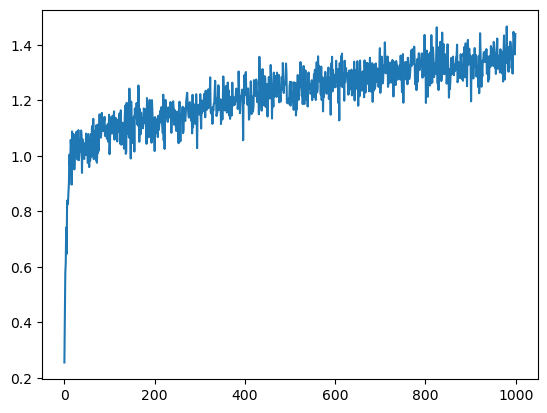

In [23]:
calc_plot(1000, 500, 0.01)

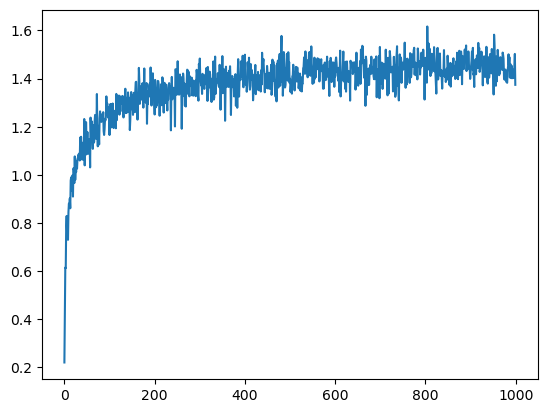

In [24]:
calc_plot(1000, 500, 0.1)

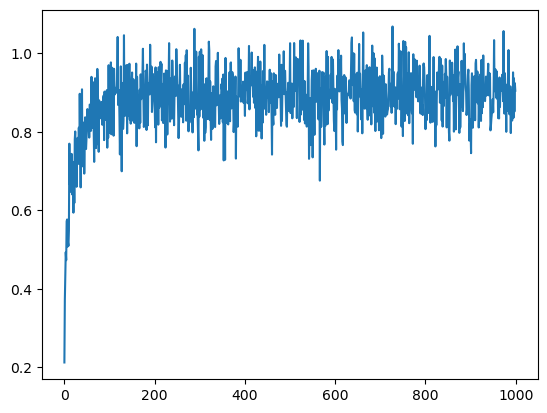

In [25]:
calc_plot(1000, 500, 0.5)

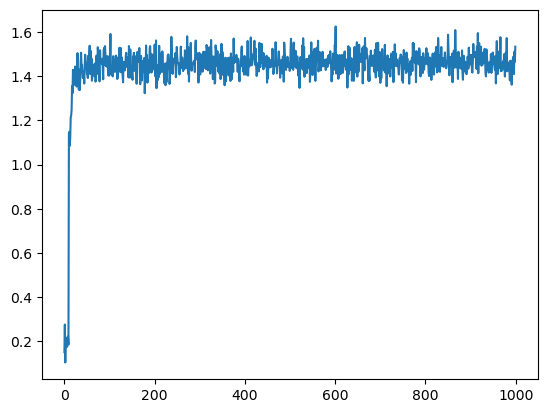

In [27]:
calc_plot(1000,500,0,5)